https://medium.com/@htejaswini.hanu/from-words-to-visual-insights-exploring-sentence-embeddings-with-sentence-transformers-t-sne-and-a242deb2be62

In [7]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

Load the HF model 

In [8]:
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

Some example sentences to embedd

In [9]:
sentences = [
    "The cat sits on the mat.",
    "A dog is playing with a ball.",
    "The sun is shining brightly.",
    "It's raining cats and dogs.",
    "She enjoys reading books.",
    "He is playing the guitar.",
    "The weather is pleasant today.",
    "Reading is a good habit.",
    "He loves playing football.",
    "She is learning to play the piano."
]


In [10]:
embeddings = model.encode(sentences, convert_to_tensor=True)

## Understanding t-SNE 

**t-SNE** (t-distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique that transforms high-dimensional data into 2D or 3D for visualization. It is particularly effective at preserving **local structures**, making it useful for understanding how sentence embeddings cluster semantically.

Transformer-based models like `all-mpnet-base-v2` output embeddings in a **768-dimensional space**. Humans can’t visualize that — so we use t-SNE to project these down to 2 dimensions while maintaining relationships between similar sentences.

### How t-SNE Works (High-Level)

- **Step 1**: Calculates pairwise similarity probabilities in high-dimensional space.
- **Step 2**: Creates a similar probability distribution in low-dimensional space.
- **Step 3**: Optimizes the positions in low-dimensional space to minimize the divergence between these distributions (using Kullback-Leibler divergence).
- **Step 4**: Uses a Student-t distribution in 2D space to help prevent the "crowding problem".

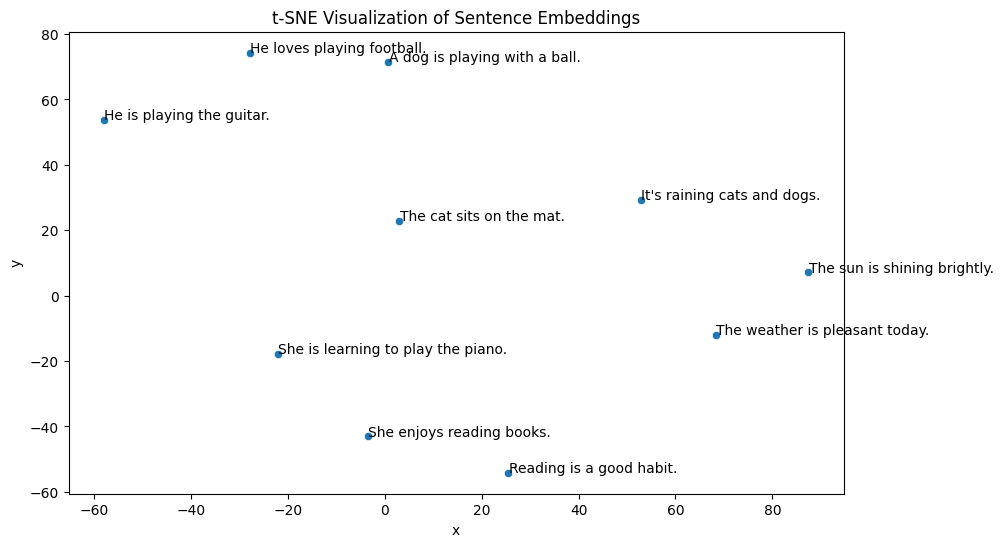

In [11]:
# Reduce dimensions for visualization
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings.cpu().numpy())

# Plot the embeddings
plt.figure(figsize=(10, 6))
sns.scatterplot(x=embeddings_2d[:,0], y=embeddings_2d[:,1])

# Annotate points with sentences
for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (embeddings_2d[i,0]+0.1, embeddings_2d[i,1]+0.1))

plt.title("t-SNE Visualization of Sentence Embeddings")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [12]:
# query
query = "He enjoys playing music."

# embedd the query
query_embedding = model.encode(query, convert_to_tensor=True)

# compute cosine similarities
cosine_scores = util.cos_sim(query_embedding, embeddings)[0]

# convert tensor to NumPy (on CPU) before using NumPy functions
cosine_scores_np = cosine_scores.cpu().numpy()

# find the top 3 most similar sentences
top_results = np.argpartition(-cosine_scores_np, range(3))[:3]

print(f"Query: {query}\n")
print("Top 3 most similar sentences in the corpus:")
for idx in top_results:
    print(f"{sentences[idx]} (Score: {cosine_scores_np[idx]:.4f})")



Query: He enjoys playing music.

Top 3 most similar sentences in the corpus:
He is playing the guitar. (Score: 0.6630)
He loves playing football. (Score: 0.3797)
She is learning to play the piano. (Score: 0.2550)
